# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

一个神经元将所有输入到该神经元的值透过一组可学习的weights做线性变换后，加上一个可学习的bias得到z，再透过非线性函数activation function，将z映射成输出值。
宽泛点说，神经元的作用就是将所有输入信号关联起来，得到一个个体体判断，输出该神经元的计算结果，再利用不同神经元之间的相互联系，得到整体判断，最后再利用整体判断的结果与真实的结果进行比较，然后反向调整个别神经元的参数，使得整个神经网络能够适应不同的输入，且做出正确的输出。

####  2. Why we use non-linear activation funcitons in neural networks?

如果没有activation function那整个网络相当于一个线性变换加上一定的坐标平移，在空间上就是一个超平面，利用一个超平面去对数据进行分割是有局限性的，不是所有数据都刚刚好可以分布在某个平面的两端。所以需要一定的非线性变换，使得分割曲面不是一个简单的平面，而是一个甚至多个复杂的曲面的组合，从而适应各种分布的数据。
另一个角度就是，activation function可以保证在最后一层神经元进行分类前，之前的神经网络可以将数据非线性得变换到可以很好用简单得平面分类得形式。

#### 3. What is the 'Logistic Loss' ?

$$ Loss function(logistic regression) = -y log(\hat{y})-(1-y)log(1-\hat{y}) $$

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

判断有没有猫，是是非题，只需要输出一个概率（0~1之间）即可。所以可以尝试使用sigmoid或平移缩放后的tanh。ReLU和Leaky ReLU一般用在hidden layer的输出。

#### 5. Why we don't use zero initialization for all parameters ?

#### 6. Can you implement the softmax function using python ? 

In [ ]:
def softmax(inputs):#inputs is a list of softmax function's input nodes
    values=np.array([n.value for n in inputs])
    exp_value=np.exp(values)
    return exp_value/np.sum(exp_value)

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

#### 2 - Overview of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as 0 if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [2]:
# Loading the data 
digits = datasets.load_digits()

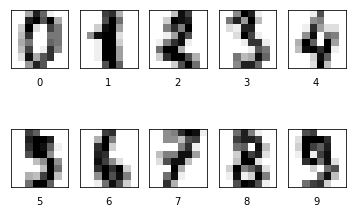

In [8]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [9]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [10]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [14]:
print(digits.data.shape)
print(digits.target.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1797, 64)
(1797,)
(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

In [15]:
!pwd

'pwd' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [27]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1./(1 + np.exp(-1 * z))
    
    return s

In [28]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [29]:
# Random innitialize the parameters

def initialize_parameters(dim):

    '''
    Argument: dim -- size of the w vector
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim,1)
    b = np.random.randn()
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [114]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[0]
    z = np.dot(X,w)+b
    A = sigmoid(z)
    #print(np.log(1-A+np.finfo(float).eps))
    log_A =np.log(A)
    log_A_bar =np.log(1-A)
    log_A[log_A == -np.inf]=0
    log_A_bar[log_A_bar == -np.inf]=0

    cost = (-1/m )*(np.dot(Y,log_A)+np.dot((1-Y),log_A_bar))
    dw = (1/m)*np.dot(X.T,(A-Y.reshape(-1,1)))
    db = (1/m)*np.sum(A-Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [115]:
w,b=initialize_parameters(X_test.shape[1])
propagate(w,b,X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


({'dw': array([[ 0.00000000e+00],
         [-1.22222222e-01],
         [-2.73916903e+00],
         [-5.99911188e+00],
         [-5.79179138e+00],
         [-3.30762223e+00],
         [-7.17599883e-01],
         [-2.66666667e-02],
         [-8.88888889e-03],
         [-8.70228475e-01],
         [-5.76570145e+00],
         [-5.45589779e+00],
         [-4.02921394e+00],
         [-3.79595678e+00],
         [-9.45017456e-01],
         [-8.88888889e-03],
         [-2.22222222e-03],
         [-1.44444435e+00],
         [-5.67981478e+00],
         [-2.81860908e+00],
         [-2.34757891e+00],
         [-3.34241897e+00],
         [-7.15824569e-01],
         [-2.22222222e-03],
         [ 4.38343873e-60],
         [-1.25781762e+00],
         [-5.36648690e+00],
         [-5.35321386e+00],
         [-4.96617290e+00],
         [-3.84665555e+00],
         [-8.56770363e-01],
         [ 4.56791860e-32],
         [ 0.00000000e+00],
         [-6.35363668e-01],
         [-3.87338789e+00],
         [-5.1

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [41]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w -= learning_rate*dw
        b -= learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [72]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[1],1)
    z = np.dot(X,w)+b
    A = sigmoid(z)
    A[A>0.5]=1
    A[A<=0.5]=0
    Y_prediction=A.reshape(1,-1)
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [73]:
def accuracy(Y_prediction,Y):

    return np.sum(Y_prediction.reshape(-1,1)==Y.reshape(-1,1))/Y_prediction.size

In [116]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    w,b = initialize_parameters(X_train.shape[1])
    params,grads,cost = optimize(w=w, b=b, X=X_train, Y=Y_train, num_iterations=num_iterations, learning_rate=learning_rate, print_cost=print_cost)

    traing_accuracy = accuracy(predict(params['w'], params['b'], X_train),Y_train)
    test_accuracy = accuracy(predict(params['w'], params['b'], X_test),Y_test)

    d = {   "w":params['w'],
            "b":params['b'],
            "training_accuracy": traing_accuracy,
            "test_accuracy":test_accuracy,
            "cost":cost
        }
    return d

In [125]:
model(X_train, y_train, X_test, y_test, num_iterations=5000, learning_rate=0.001,print_cost=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
Cost after iteration 0: 6.039224
Cost after iteration 100: 8.196972
Cost after iteration 200: 7.645329
Cost after iteration 300: 6.890646
Cost after iteration 400: 6.029121
Cost after iteration 500: 5.286744
Cost after iteration 600: 4.647485
Cost after iteration 700: 4.126366
Cost after iteration 800: 3.714677
Cost after iteration 900: 3.328789
Cost after iteration 1000: 3.008876
Cost after iteration 1100: 2.713545
Cost after iteration 1200: 2.491965
Cost after iteration 1300: 2.311569
Cost after iteration 1400: 2.138646
Cost after iteration 1500: 1.992522
Cost after iteration 1600: 1.892777
Cost after iteration 1700: 1.781636
Cost after iteration 1800: 1.738815
Cost after iteration 1900: 1.653784
Cost after iteration 2000: 1.605464
Cost after iteration 2100: 1.538448
Cost after iteration 2200: 1.478119
Cost after iteration 2300: 1.424086
C

{'w': array([[ 1.02850813],
        [-0.0375937 ],
        [-0.7078746 ],
        [ 0.00565553],
        [-0.1390186 ],
        [ 0.68757236],
        [-0.11393968],
        [-0.2272394 ],
        [ 1.69214504],
        [ 0.49440701],
        [ 0.81348262],
        [ 0.3530236 ],
        [-0.07273144],
        [ 0.08290625],
        [-0.22152713],
        [ 0.44885259],
        [-1.08307446],
        [-0.38280536],
        [ 0.26305185],
        [-0.01083994],
        [-0.6716177 ],
        [-0.11517501],
        [ 0.54024309],
        [-0.10594904],
        [ 1.1215325 ],
        [ 0.70387316],
        [-0.07276314],
        [ 0.81179103],
        [ 0.15887308],
        [ 0.54365359],
        [-0.25177584],
        [ 0.31888238],
        [ 0.40613074],
        [-0.36280943],
        [-0.35362179],
        [ 0.73722437],
        [-0.58451858],
        [-0.02228371],
        [-0.77767489],
        [-0.06957628],
        [ 0.08306776],
        [-0.37826329],
        [ 0.65500047],
      

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

##### 4.2 Observe the effect of iteration_num on the test accuracy.

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 